In [1]:
import os

# Local
from evaluation_classes import RecordedPath, TaskPath, PathPlotter, HLCPath
from evaluation_tools import PATHTYPES

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


Python older than 3.7 detected. 


## Loading task paths

TaskPaths are BasePath objects that contain the coordinates of the json task.

Important notes:
- The path to the taskpath is relative to /app/tasks/

In [2]:
def get_taskpath(country_,ranch_,filename_):
    _file_path = os.path.join(country_,ranch_, filename_)

    return TaskPath(path_to_taskfile__=_file_path, path_name_=filename_, plot_format_='x')

In [3]:
country = "IL"
ranch = "binyamina"
filename = "biny_Block11_shorttask.json"

task_path = get_taskpath(country, ranch, filename)  

origin = task_path.get_first_waypoint()
lat_og, lon_og = origin[0], origin[1]
task_path.define_origin_coordinates(origin[0], origin[1])

json task loaded | 91 waypoints loaded

TaskPath instance created
Origin coordinates set to (32.51043035, 34.93443311)


## Load Recorded path (either from bag or from Datalogger)
### Load mark-event bag

In [4]:
# Parameters for loading up recordings
country = "IL"
ranch = "binyamina"
date = "14_feb" # dd_mmm
filename = "shorttask_record.bag"
directory = os.path.join("/home/iony/Documents/mark-events",country,ranch,date)
bag_path = os.path.join(directory,filename)

short_task_bag = RecordedPath(
    path_to_recordfile_=bag_path,
    origin_=RecordedPath.BAG,
    path_name_ = filename,
    plot_format_='--')

short_task_bag.define_origin_coordinates(lat_=lat_og, lon_=lon_og)
# task_path,short_task_bag

[INFO]  Data folder /home/iony/Documents/mark-events/IL/binyamina/14_feb/shorttask_record already exists. Not creating.
'/home/iony/Documents/mark-events/IL/binyamina/14_feb/shorttask_record.bag' loaded in 4.2929 seconds to path shorttask_record.bag
Origin coordinates set to (32.51043035, 34.93443311)


In [5]:
# short_task_bag.get_latlon_path()

### Load Datalogger

In [6]:
# Parameters for loading up the HLC path
country = "IL"
ranch = "binyamina"
date = "14_feb" # dd_mmm
filename = "short_task_v15_2.csv"
directory = os.path.join("/home/iony/Documents/mark-events",country,ranch,date)
file_path = os.path.join(directory,filename)

csv_4_task = RecordedPath(
    path_to_recordfile_=file_path,
    origin_=RecordedPath.DATALOGGER,
    path_name_ = filename,
    plot_format_='--')

csv_4_task.define_origin_coordinates(lat_=lat_og, lon_=lon_og)

'/home/iony/Documents/mark-events/IL/binyamina/14_feb/short_task_v15_2.csv' loaded in 0.0155 seconds to path short_task_v15_2.csv
Origin coordinates set to (32.51043035, 34.93443311)


### Loading paths from HLC 

In [7]:
# # Parameters for loading up the HLC path
# country = "IL"
# ranch = "binyamina"
# date = "14_feb" # dd_mmm
# filename = "short_task_v15_2.csv"
# csv_directory = f"Task_CSVs/{country}/{ranch}/{date}/{filename}"

# csv_for_task = HLCPath(
#     path_to_csv_=csv_directory,
#     path_name_=filename,
#     plot_format_='x',
#     use_pymap_=True)
    
# csv_for_task.define_origin_coordinates(lat_=lat_og, lon_=lon_og)
# csv_for_task.set_returntype_forplot(PATHTYPES.LOWRES_PATH)

# Plotting

In [8]:
pp = PathPlotter()


PathPlotter instance created


### Format the paths

In [13]:
task_path._set_plot_format('ob')
short_task_bag._set_plot_format('--.g')
csv_4_task._set_plot_format("--.y")

### Toggle the use pf pymap

In [10]:
paths = [task_path, short_task_bag, csv_4_task]
# paths = [csv_4_task]
for path in paths:
    print()
    print(path.get_pathname())
    path.toggle_pymap_use(True)
    path.set_returntype_forplot(PATHTYPES.LOWRES_PATH)



biny_Block11_shorttask.json
biny_Block11_shorttask.json  using Pymap
PATHTYPE LOWRES_PATH set for biny_Block11_shorttask.json

shorttask_record.bag
shorttask_record.bag  using Pymap
PATHTYPE LOWRES_PATH set for shorttask_record.bag

short_task_v15_2.csv
short_task_v15_2.csv  using Pymap
PATHTYPE LOWRES_PATH set for short_task_v15_2.csv


### Plot the paths
the paths must be given in a list, even if one

In [11]:
%matplotlib notebook

<IPython.core.display.Javascript object>


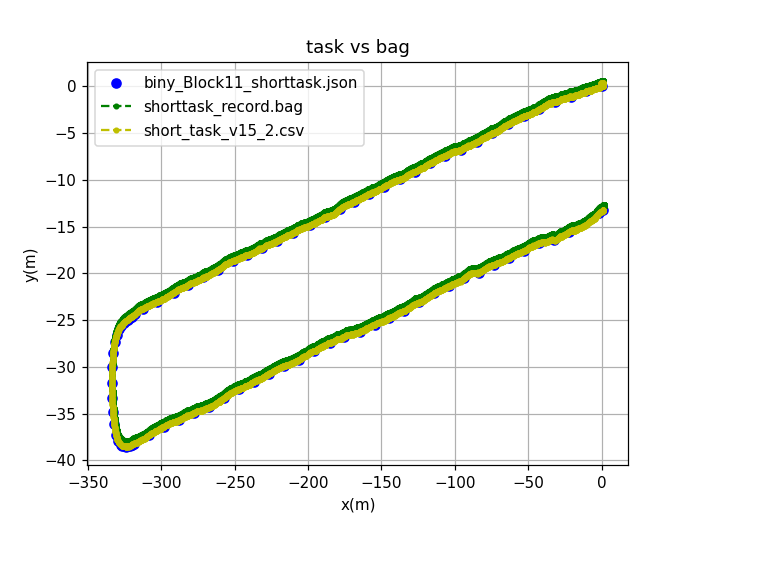

In [14]:
pp.plot_paths(paths, "task vs bag")